In [1]:
import sys
code_path = '/Users/caiq/Workspace/adp/text-classifier/src'
sys.path.append(code_path)


In [2]:
import pandas as pd
from eda.data_explorer import plot_sample_length_distribution, plot_frequency_distribution_of_ngrams
from eda.model_decision_maker import get_ratio_of_samples_over_words_counts


Bad key savefig.frameon in file /Users/caiq/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/caiq/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/caiq/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.s

In [3]:
# load data
train_path = '/Users/caiq/Workspace/adp/text-classifier/data/datasets/cr_sents/train.csv'
test_path = '/Users/caiq/Workspace/adp/text-classifier/data/datasets/cr_sents/train.csv'
classes = ['benefits', 'company', 'responsibility', 'qualification']
rev_labels_map = {idx+1: cls for idx, cls in enumerate(classes)}
train_data = pd.read_csv(train_path).replace({"Label": rev_labels_map})
test_data = pd.read_csv(test_path).replace({"Label": rev_labels_map})
print('Training data overview ...')
train_data.head(5)

Training data overview ...


,Label,Text
0,responsibility,"experience in a strategic position, working in..."
1,qualification,this position will ensure that all early inter...
2,benefits,part time and full time shifts
3,responsibility,50% walking25% bending amp; lifting25% standin...
4,qualification,lubricating all equipment and machinery as needed


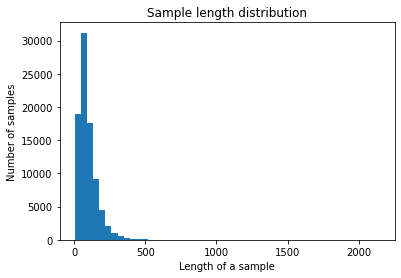

In [74]:
# Get distribution of sample length
plot_sample_length_distribution(train_data['Text'].values)

<AxesSubplot:xlabel='Label'>

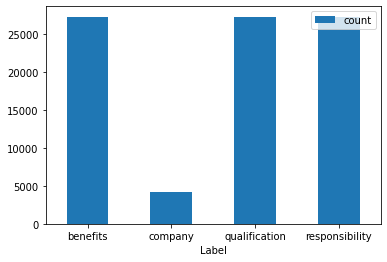

In [8]:
# Get number of samples per class (training dataset)
samples_counts_by_label = train_data.groupby(['Label']).Text.agg('count').to_frame('count').reset_index()
samples_counts_by_label.replace({"Label": rev_labels_map})
samples_counts_by_label.plot.bar(x='Label', y='count', rot=0)

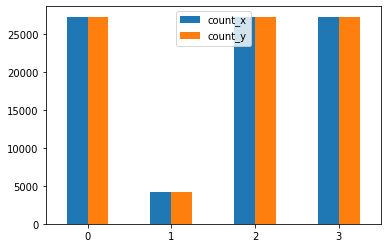

In [76]:
# Plot the label distribution in both train and test dataset
train_counts = train_data.groupby(['Label']).Text.agg('count').to_frame('count').reset_index()
test_counts = test_data.groupby(['Label']).Text.agg('count').to_frame('count').reset_index()
merged_counts = pd.merge(train_counts, test_counts, on="Label")

ax = merged_counts.plot.bar(rot=0)

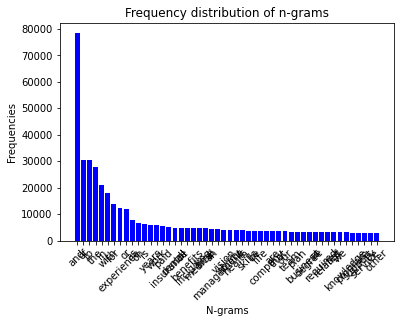

In [81]:
# Plot the frequency distrbution of n-grams
plot_frequency_distribution_of_ngrams(train_data.Text.values, ngram_range=(1, 2), num_ngrams=50)

In [93]:
# Select the correct model for training
ratio_of_samples_over_words_counts = get_ratio_of_samples_over_words_counts(train_data['Text'].values)
ratio_of_samples_over_words_counts

7830.727272727273